In [1]:
# Step 1: Upload dataset
from google.colab import files
uploaded = files.upload()

Saving merged_student_data.csv to merged_student_data.csv


In [2]:
import pandas as pd  # For handling datasets
import matplotlib.pyplot as plt  # For basic plotting
import seaborn as sns  # For advanced plotting
from sklearn.preprocessing import StandardScaler  # To standardize data
from sklearn.decomposition import PCA  # To reduce dimensions for visualization
from sklearn.cluster import KMeans  # K-Means clustering algorithm


In [3]:
df = pd.read_csv('merged_student_data.csv')
df.head()


,student_id,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,absences,G1,G2,G3
0,1,0,0,0.428571,1,0,0,1.00,1.00,0,4,0,1,0.333333,0.333333,0.0,0.1250,0.000000,0.578947,0.578947
1,2,0,0,0.285714,1,0,1,0.25,0.25,0,2,0,0,0.000000,0.333333,0.0,0.0625,0.473684,0.578947,0.578947
2,3,0,0,0.000000,1,1,1,0.25,0.25,0,2,2,1,0.000000,0.333333,0.0,0.1875,0.631579,0.684211,0.631579
3,4,0,0,0.000000,1,0,1,1.00,0.50,1,3,1,1,0.000000,0.666667,0.0,0.0000,0.736842,0.736842,0.736842
4,5,0,0,0.142857,1,0,1,0.75,0.75,2,2,1,0,0.000000,0.333333,0.0,0.0000,0.578947,0.684211,0.684211


In [4]:
# Example numerical features for clustering
features = ['studytime', 'absences', 'G1', 'G2', 'G3']

data = df[features]

# Handle missing values
data = data.dropna()

# Quick summary statistics
data.describe()


,studytime,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000
mean,0.310221,0.114359,0.599951,0.608953,0.626632
std,0.276503,0.145024,0.144488,0.153349,0.170035
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.526316,0.526316,0.526316
50%,0.333333,0.062500,0.578947,0.578947,0.631579
75%,0.333333,0.187500,0.684211,0.684211,0.736842
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
#Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)


In [18]:
#Reduce dimensions using PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

df_pca = pd.DataFrame(data=pca_data, columns=['PCA1', 'PCA2'])


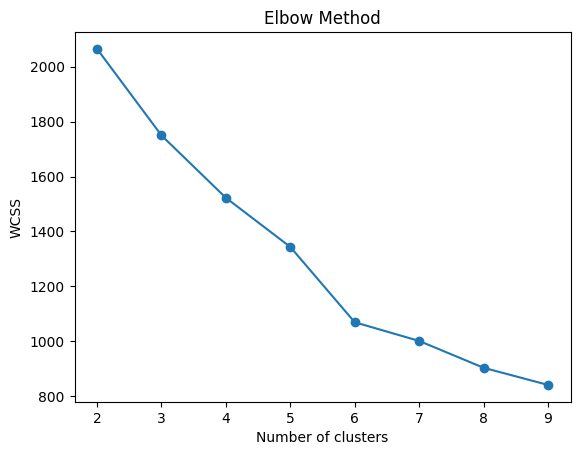

In [7]:
#elbow method
wcss = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

plt.plot(range(2, 10), wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()


In [8]:
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

# Check how many students are in each cluster
print(df['Cluster'].value_counts())


Cluster
2    238
3    188
0    142
1     81
Name: count, dtype: int64


In [9]:
cluster_summary = df.groupby('Cluster')[features].mean()
print(cluster_summary)


         studytime  absences        G1        G2        G3
Cluster                                                   
0         0.417840  0.062280  0.787620  0.809118  0.832098
1         0.773663  0.093750  0.606888  0.612086  0.635478
2         0.189076  0.130121  0.612782  0.618310  0.643521
3         0.182624  0.142620  0.438970  0.444569  0.446249


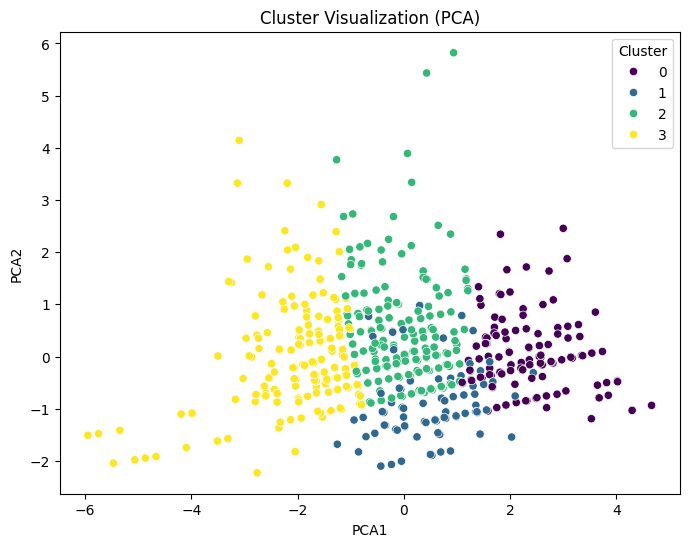

In [12]:
import os

#Scatter Plot (2D using PCA):

plt.figure(figsize=(8,6))
sns.scatterplot(x=df_pca['PCA1'], y=df_pca['PCA2'], hue=df['Cluster'], palette='viridis')
plt.title("Cluster Visualization (PCA)")

# Create the directory if it doesn't exist
if not os.path.exists('visualizations'):
    os.makedirs('visualizations')

plt.savefig("visualizations/cluster_scatter.png")
plt.show()

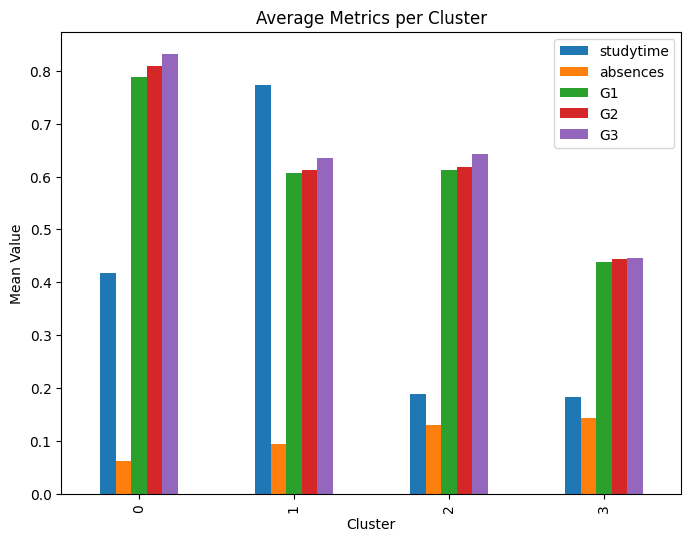

In [13]:
#Bar plots showing mean/median of key metrics per cluster

cluster_summary.plot(kind='bar', figsize=(8,6))
plt.title("Average Metrics per Cluster")
plt.ylabel("Mean Value")
plt.savefig("visualizations/cluster_profile_bar.png")
plt.show()


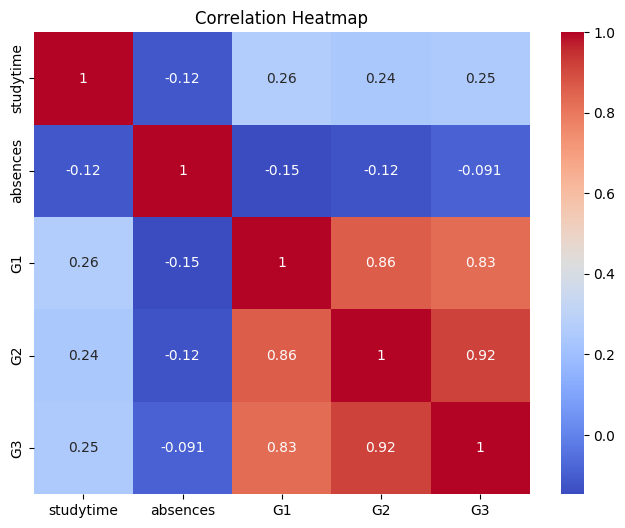

In [14]:

plt.figure(figsize=(8,6))
sns.heatmap(df[features].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.savefig("visualizations/correlation_heatmap.png")
plt.show()


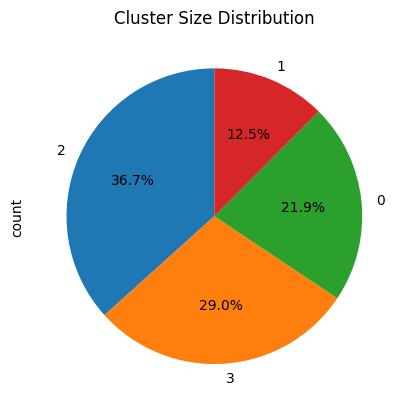

In [15]:
#Pie chart or count plot showing how many samples belong to each cluster.

df['Cluster'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title("Cluster Size Distribution")
plt.show()


In [16]:

cluster_summary = df.groupby('Cluster')[features].mean()
print(cluster_summary)


         studytime  absences        G1        G2        G3
Cluster                                                   
0         0.417840  0.062280  0.787620  0.809118  0.832098
1         0.773663  0.093750  0.606888  0.612086  0.635478
2         0.189076  0.130121  0.612782  0.618310  0.643521
3         0.182624  0.142620  0.438970  0.444569  0.446249


## Interpretation & Insights

Based on the clustering results using K-Means (4 clusters), we can interpret the clusters as follows:

- **Cluster 0:**  
  - Studytime: 0.42 (moderate-high)  
  - Absences: 0.06 (very low)  
  - Grades (G1, G2, G3): ~0.79–0.83 (high)  
  - **Insight:** These students study regularly, have very few absences, and achieve consistently high grades. → **Top performers / Highly diligent students**

- **Cluster 1:**  
  - Studytime: 0.77 (highest among clusters)  
  - Absences: 0.09 (low)  
  - Grades: ~0.61–0.64 (moderate)  
  - **Insight:** These students spend a lot of time studying, attend classes regularly, but their grades are not as high as Cluster 0. → **Hardworking but moderate performers**

- **Cluster 2:**  
  - Studytime: 0.19 (low)  
  - Absences: 0.13 (moderate)  
  - Grades: ~0.61–0.64 (moderate)  
  - **Insight:** Students in this cluster study very little, have slightly more absences, yet maintain moderate grades. → **Average performers with low study commitment**

- **Cluster 3:**  
  - Studytime: 0.18 (low)  
  - Absences: 0.14 (highest)  
  - Grades: ~0.44–0.45 (low)  
  - **Insight:** These students study very little, have the most absences, and achieve the lowest grades. → **Students needing improvement / At risk of poor performance**
